## Quantile Quantile Plots

In [1]:
library(UsingR) ##available from CRAN
library(rafalib)
x <- father.son$fheight

Loading required package: MASS

Loading required package: HistData

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units



Attaching package: 'UsingR'


The following object is masked from 'package:survival':

    cancer




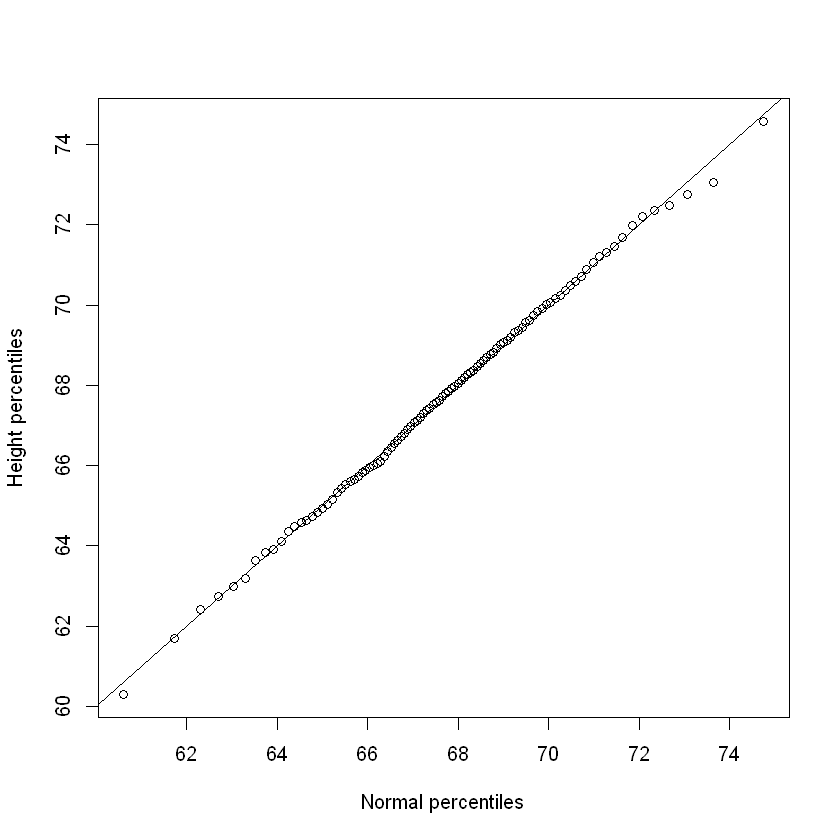

In [2]:
ps <- ( seq(0,99) + 0.5 )/100
qs <- quantile(x, ps)
normalqs <- qnorm(ps, mean(x), popsd(x))
plot(normalqs,qs,xlab="Normal percentiles",ylab="Height percentiles")
abline(0,1)

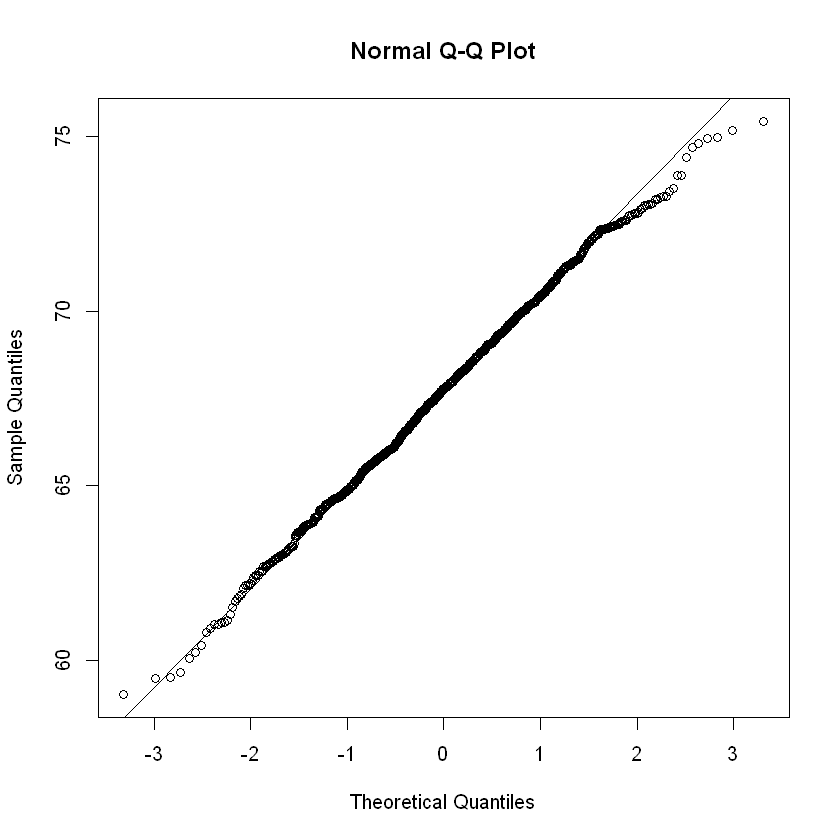

In [3]:
qqnorm(x)
qqline(x)

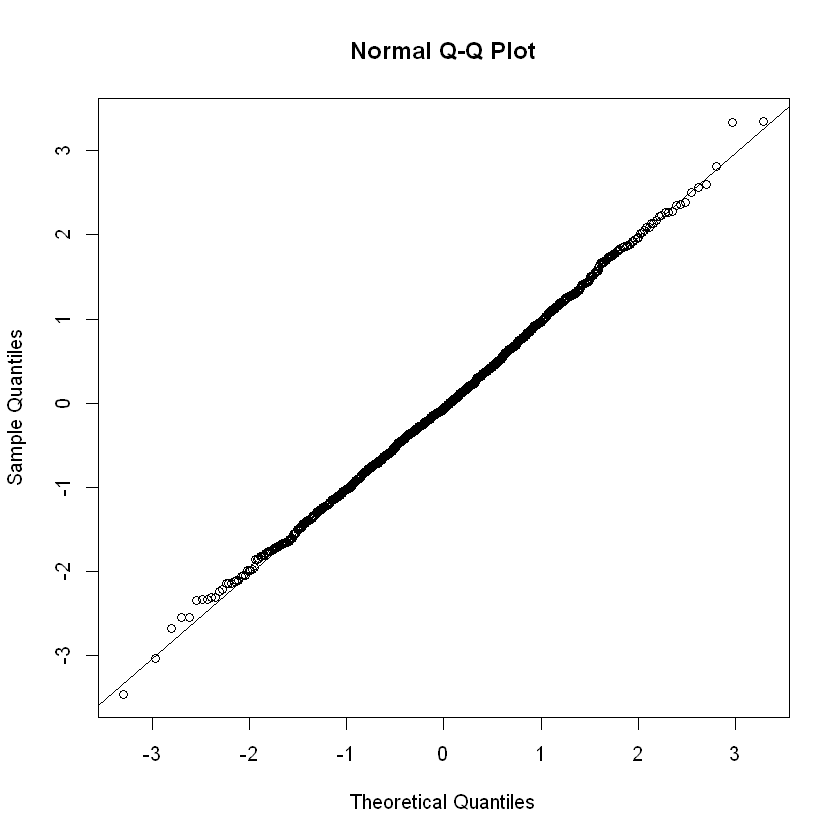

In [4]:
n <-1000
x <- rnorm(n)
qqnorm(x)
qqline(x)

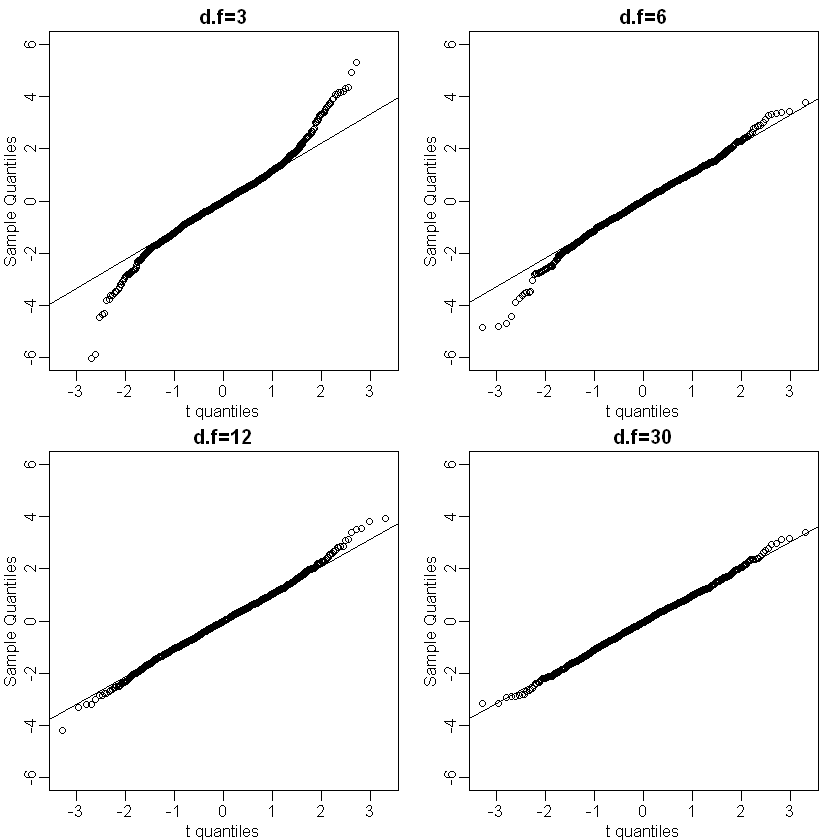

In [5]:
dfs <- c(3,6,12,30)
mypar(2,2)
for(df in dfs){
x <- rt(1000,df)
qqnorm(x,xlab="t quantiles",main=paste0("d.f=",df),ylim=c(-6,6))
qqline(x)
}

## Boxplots

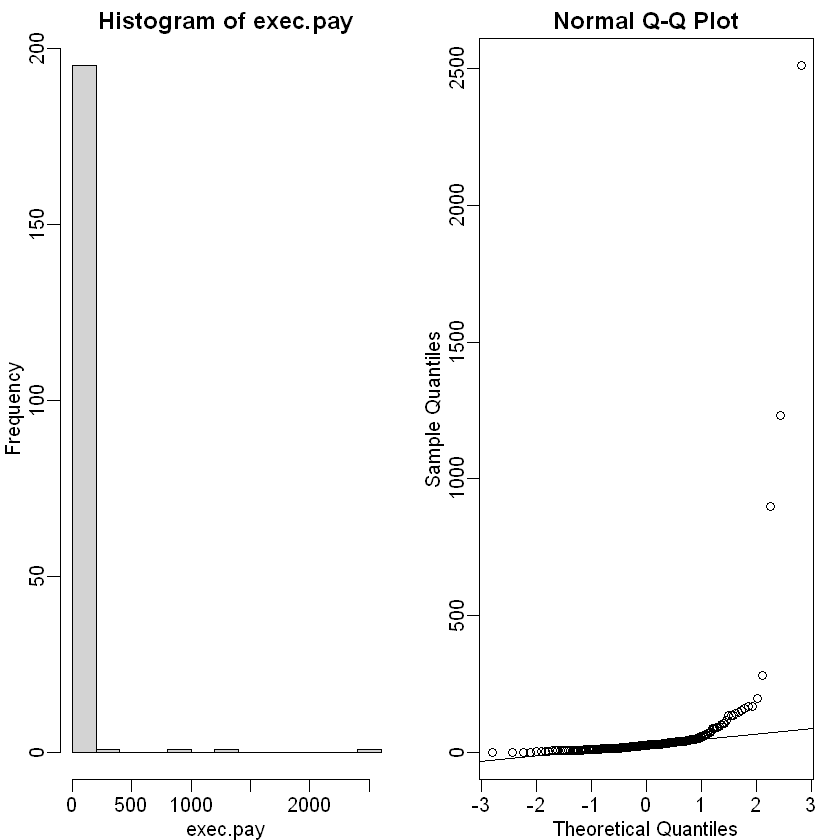

In [6]:
mypar(1,2)
hist(exec.pay) ##in UsingR package
qqnorm(exec.pay)
qqline(exec.pay)

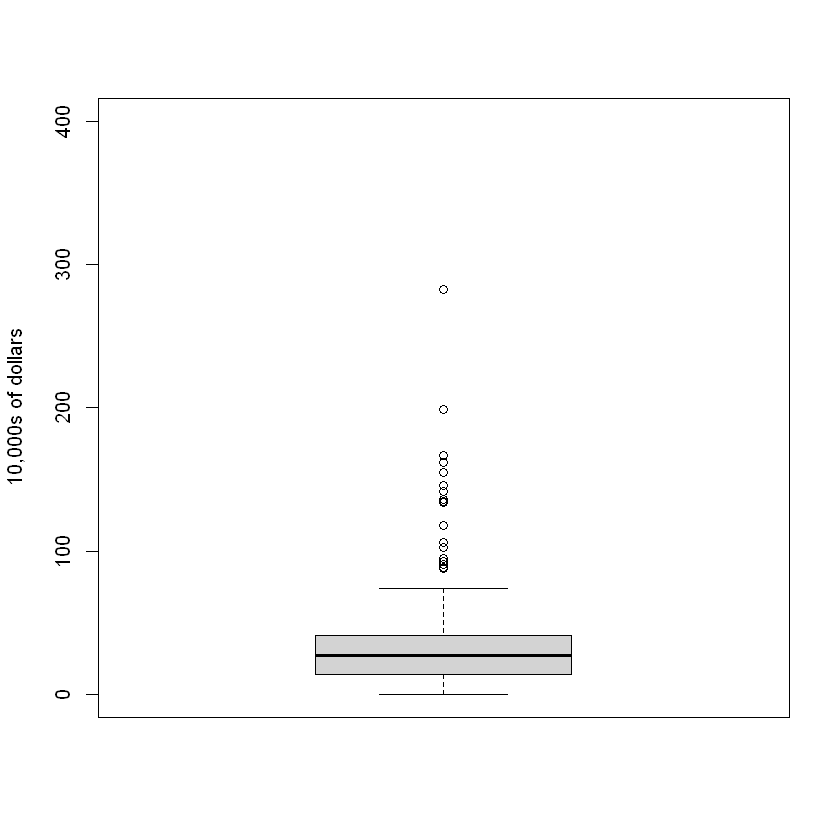

In [7]:
boxplot(exec.pay, ylab="10,000s of dollars", ylim=c(0,400))

## Scatterplots And Correlation

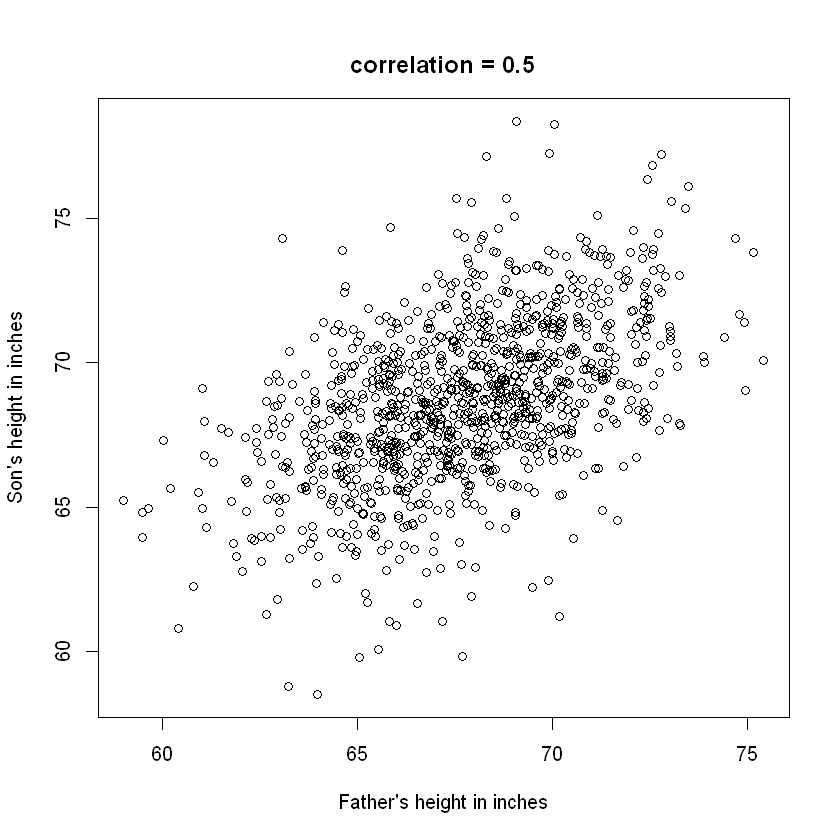

In [9]:
data("father.son") 
x=father.son$fheight
y=father.son$sheight
plot(x,y,xlab="Father's height in inches",ylab="Son's height in inches",main=paste("\
correlation =",signif(cor(x,y),2)))

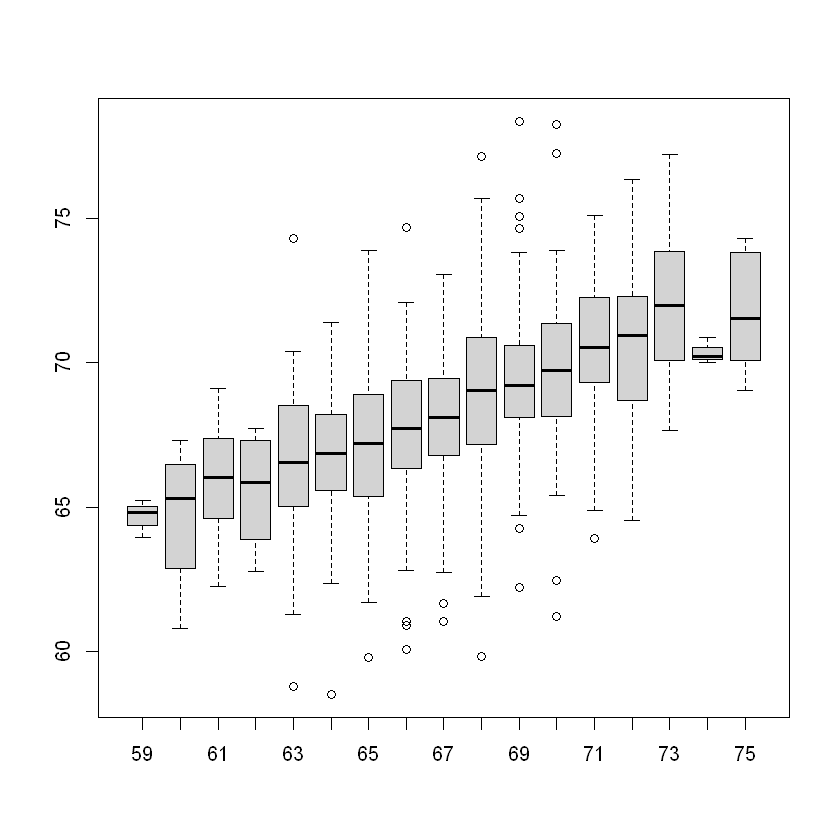

In [10]:
groups <- split(y,round(x))
boxplot(groups)

In [11]:
print(mean(y[ round(x) == 72]))

[1] 70.67719


## Bi-variate Normal Distribution

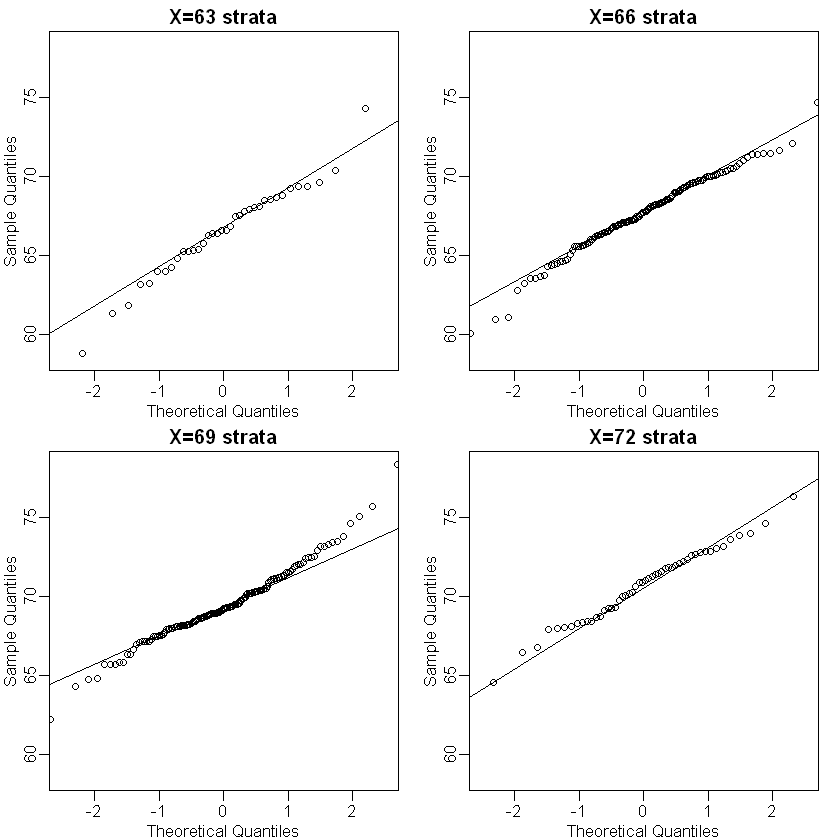

In [12]:
groups <- split(y,round(x))
mypar(2,2)
for(i in c(5,8,11,14)){
qqnorm(groups[[i]],main=paste0("X=",names(groups)[i]," strata"),
ylim=range(y),xlim=c(-2.5,2.5))
qqline(groups[[i]])
}

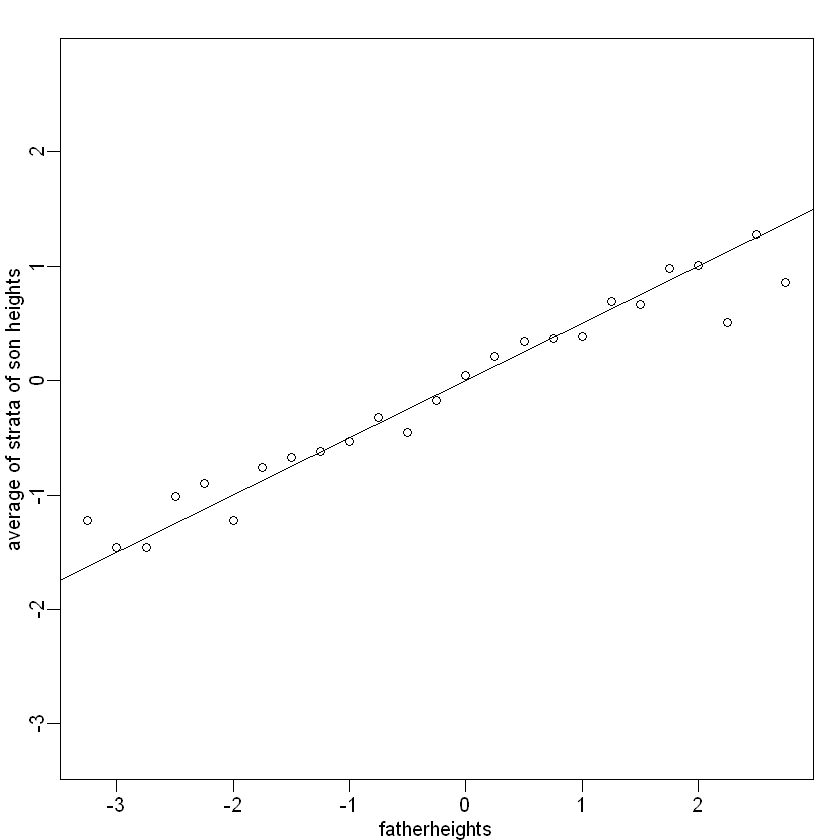

In [15]:
x=( x-mean(x) )/sd(x)
y=( y-mean(y) )/sd(y)
means=tapply(y, round(x*4)/4, mean)
fatherheights=as.numeric(names(means))
mypar(1,1)
plot(fatherheights, means, ylab="average of strata of son heights", ylim=range(fatherheights))
abline(0, cor(x,y))

## Plots To Avoid

### General principles

• Display as little information as possible.

• Obscure what you do show (with chart junk).

• Use pseudo-3D and color gratuitously.

• Make a pie chart (preferably in color and 3D).

• Use a poorly chosen scale.

• Ignore significant figures.

### Pie charts

In [32]:
info = c(1, 9, 20, 26, 44)
names = c("Opera", "Safari", "Firefox", "IE", "Chrome")

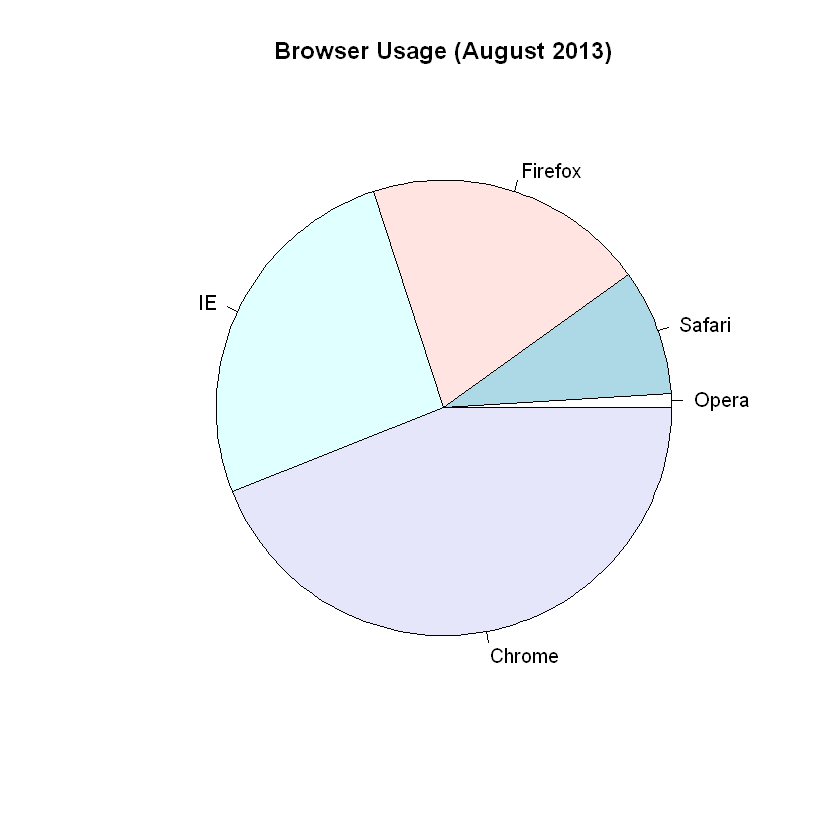

In [34]:
pie(info, labels=names,main="Browser Usage (August 2013)")

### Barplots as data summaries

In [36]:
dat<- load("D:\\desktop\\dataR\\fig1.RData")

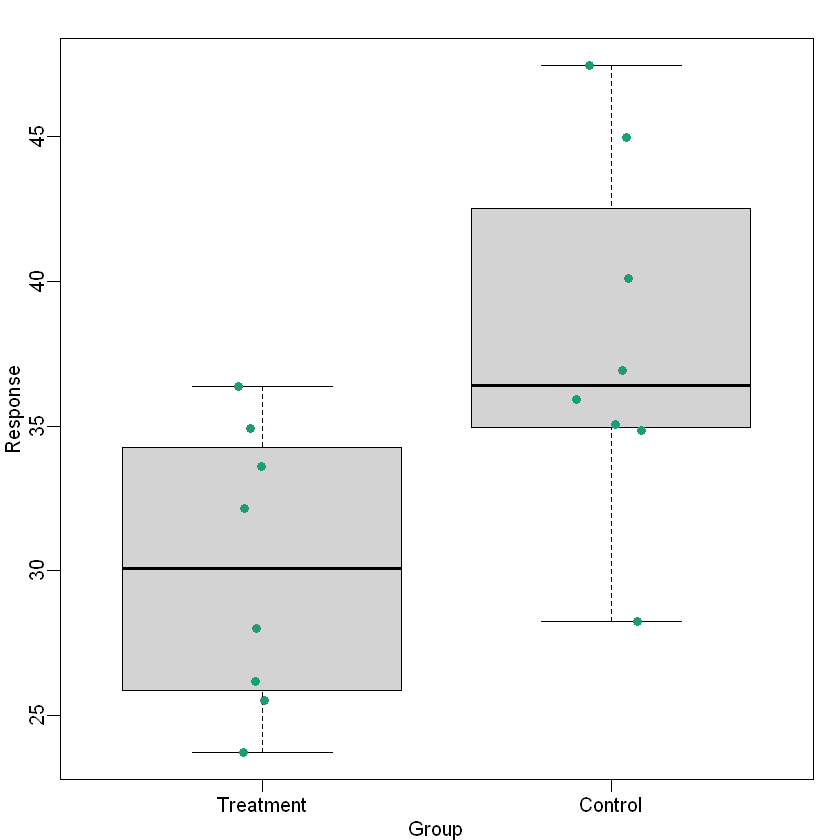

In [37]:
library(rafalib)
mypar()
dat <- list(Treatment=x,Control=y)
boxplot(dat,xlab="Group",ylab="Response",cex=0)
stripchart(dat,vertical=TRUE,method="jitter",pch=16,add=TRUE,col=1)

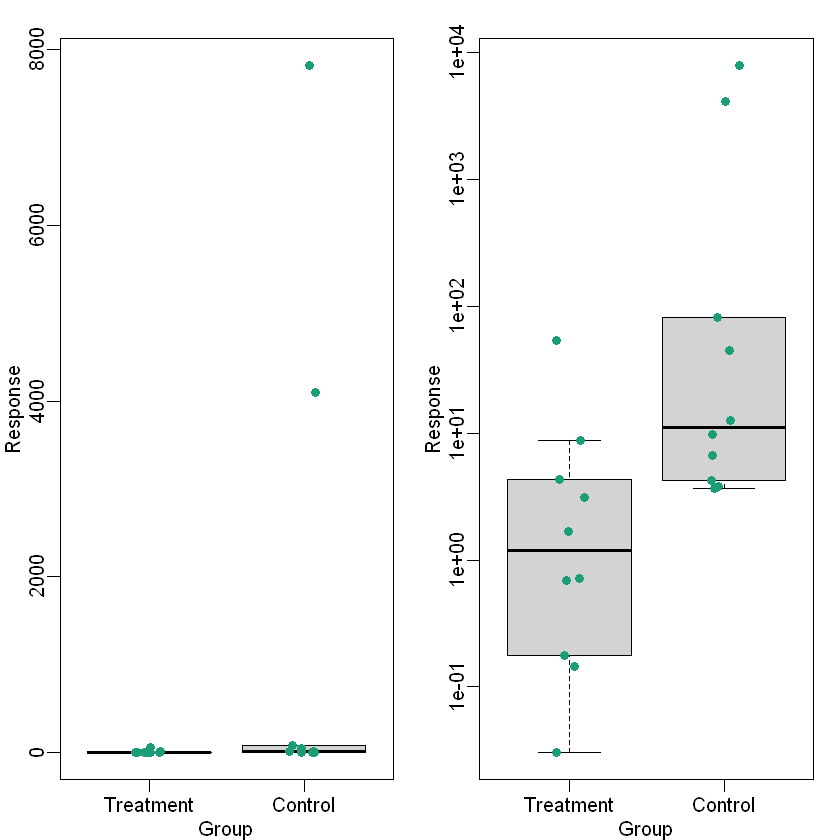

In [39]:
dat<- load("D:\\desktop\\dataR\\fig3.RData")
library(rafalib)
mypar(1,2)
dat <- list(Treatment=x,Control=y)
boxplot(dat,xlab="Group",ylab="Response",cex=0)
stripchart(dat,vertical=TRUE,method="jitter",pch=16,add=TRUE,col=1)
boxplot(dat,xlab="Group",ylab="Response",log="y",cex=0)
stripchart(dat,vertical=TRUE,method="jitter",pch=16,add=TRUE,col=1)

In [41]:
dat1<- load("D:\\desktop\\dataR\\fig4.RData")

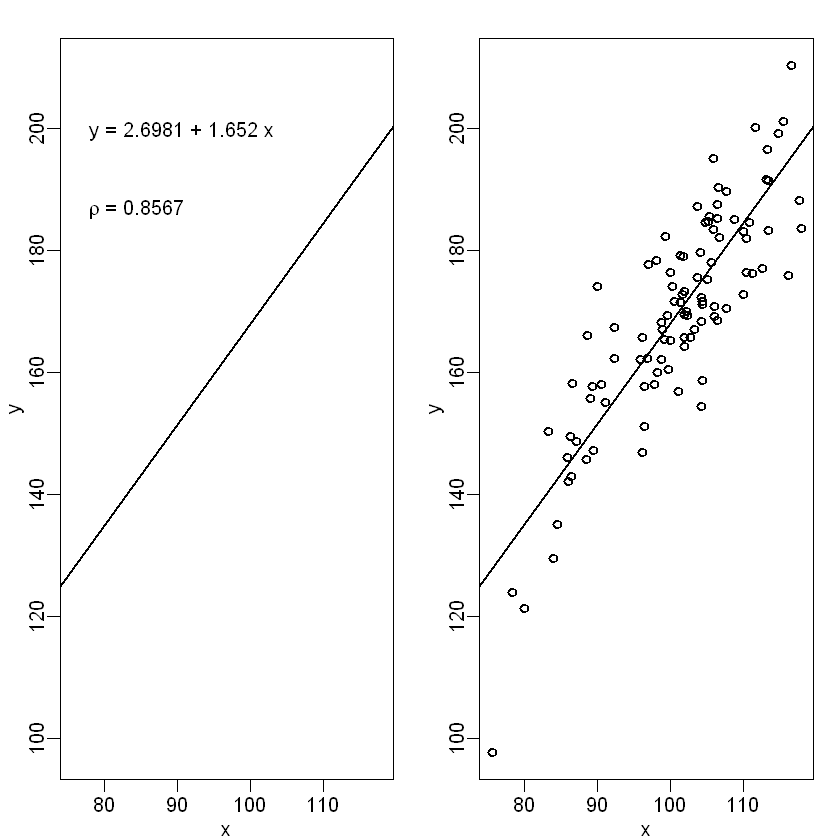

In [43]:
mypar(1,2)
plot(x,y,lwd=2,type="n")
fit <- lm(y~x)
abline(fit$coef,lwd=2) 
b <- round(fit$coef,4)
text(78, 200, paste("y =", b[1], "+", b[2], "x"), adj=c(0,0.5))
rho <- round(cor(x,y),4)
text(78, 187,expression(paste(rho," = 0.8567")),adj=c(0,0.5))
plot(x,y,lwd=2)
fit <- lm(y~x)
abline(fit$coef,lwd=2)

### Barplots for paired data

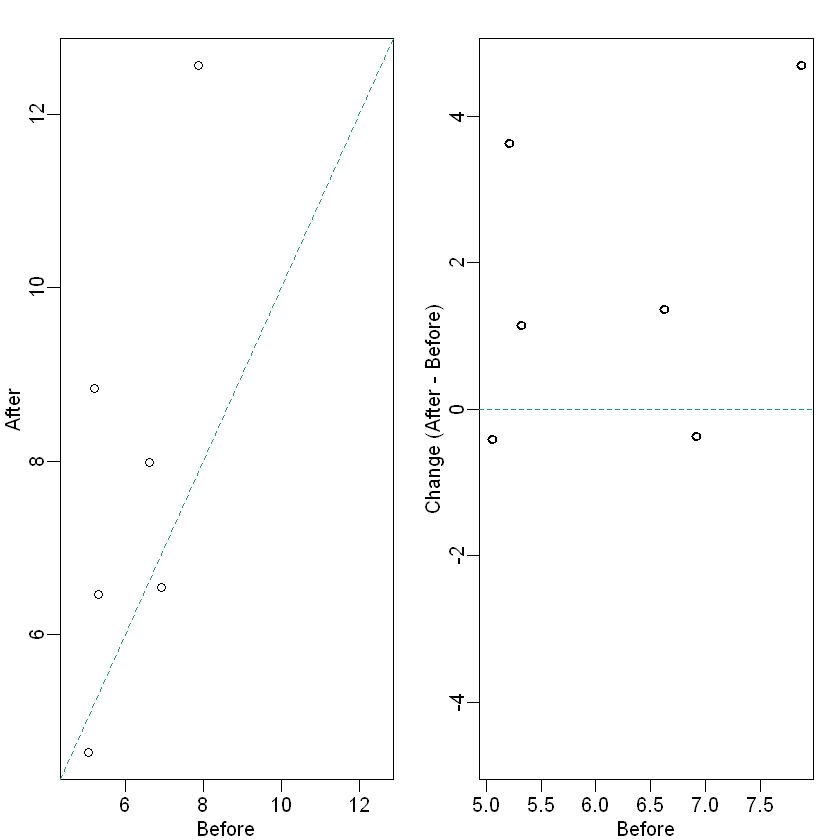

In [44]:
set.seed(12201970)
before <- runif(6, 5, 8)
after <- rnorm(6, before*1.05, 2)
li <- range(c(before, after))
ymx <- max(abs(after-before))
mypar(1,2)
plot(before, after, xlab="Before", ylab="After",
ylim=li, xlim=li)
abline(0,1, lty=2, col=1)
plot(before, after-before, xlab="Before", ylim=c(-ymx, ymx),
ylab="Change (After - Before)", lwd=2)
abline(h=0, lty=2, col=1)

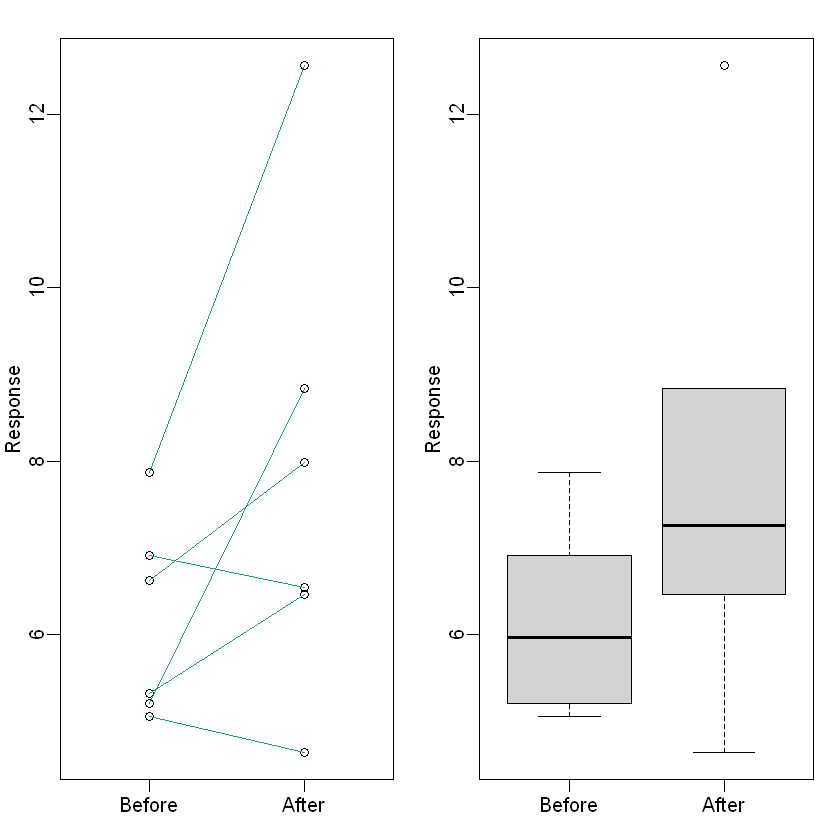

In [45]:
z <- rep(c(0,1), rep(6,2))
mypar(1,2)
plot(z, c(before, after),
xaxt="n", ylab="Response",
xlab="", xlim=c(-0.5, 1.5))
axis(side=1, at=c(0,1), c("Before","After"))
segments(rep(0,6), before, rep(1,6), after, col=1)
boxplot(before,after,names=c("Before","After"),ylab="Response")

### Too many significant digits

In [46]:
heights <- cbind(rnorm(8,73,3),rnorm(8,73,3),rnorm(8,80,3),
rnorm(8,78,3),rnorm(8,78,3))
colnames(heights)<-c("SG","PG","C","PF","SF")
rownames(heights)<- paste("team",1:8)
heights

,SG,PG,C,PF,SF
team 1,74.04819,71.86363,79.53273,80.22506,78.48729
team 2,74.33720,68.69945,83.19370,79.93180,80.38514
team 3,71.66048,68.95622,79.85152,81.28241,79.58289
team 4,76.51374,74.40771,78.62860,73.96523,79.03200
team 5,67.48229,70.13968,80.71627,77.48640,85.46786
team 6,75.82995,76.39497,78.73989,79.90654,75.27812
team 7,75.25334,73.37231,82.16955,77.94883,80.92806
team 8,76.27739,67.28033,77.97946,75.44493,81.39843


In [47]:
round(heights,1)

,SG,PG,C,PF,SF
team 1,74.0,71.9,79.5,80.2,78.5
team 2,74.3,68.7,83.2,79.9,80.4
team 3,71.7,69.0,79.9,81.3,79.6
team 4,76.5,74.4,78.6,74.0,79.0
team 5,67.5,70.1,80.7,77.5,85.5
team 6,75.8,76.4,78.7,79.9,75.3
team 7,75.3,73.4,82.2,77.9,80.9
team 8,76.3,67.3,78.0,75.4,81.4


### Displaying data well

In general, you should follow these principles:

• Be accurate and clear.

• Let the data speak.

• Show as much information as possible, taking care not to obscure the message.

• Science not sales: avoid unnecessary frills (esp. gratuitous 3D).

• In tables, every digit should be meaningful. Don’t drop ending 0’s.

## Misunderstanding Correlation (Advanced)

The standard way to quantify reproducibility between two sets of replicated measurements, say $x_1,\cdots ,x_n$ and $y_1,\cdots ,y_n$, is simply to compute the distance between them:

$\sqrt{\sum\limits_{i=1}^nd_i^2}$ with $d_i$ = $x_i$ - $y_i$

$$cor(x,y) = \frac{1}{\sqrt{1+var(d)/var(d)}}$$

P135 Exercises

Q1: Given the above histogram, how many people are between the ages of 35 and 45?

6

Q2: The InsectSprays data set is included in R. The dataset reports the counts of insects
in agricultural experimental units treated with different insecticides. Make a boxplot and
determine which insecticide appears to be most effective.

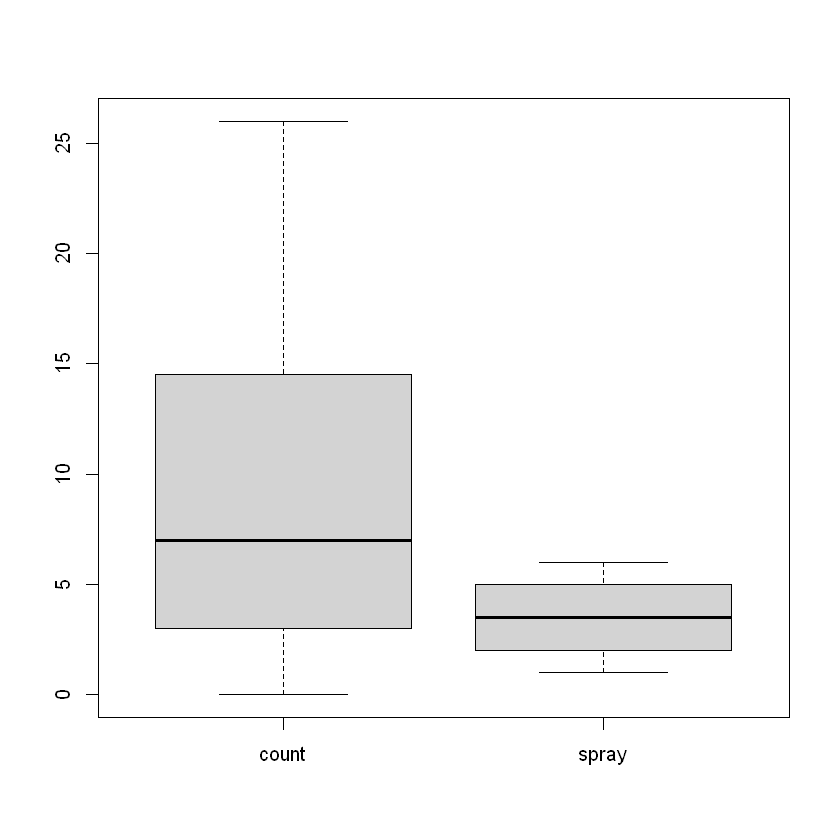

In [50]:
boxplot(InsectSprays)

Q3: Download and load this dataset into R. Use exploratory data analysis tools to determine which
two columns are different from the rest. Which is the column that is positively skewed?

Because I can't open the data in notebook, so I use RStudio to change the data as csv

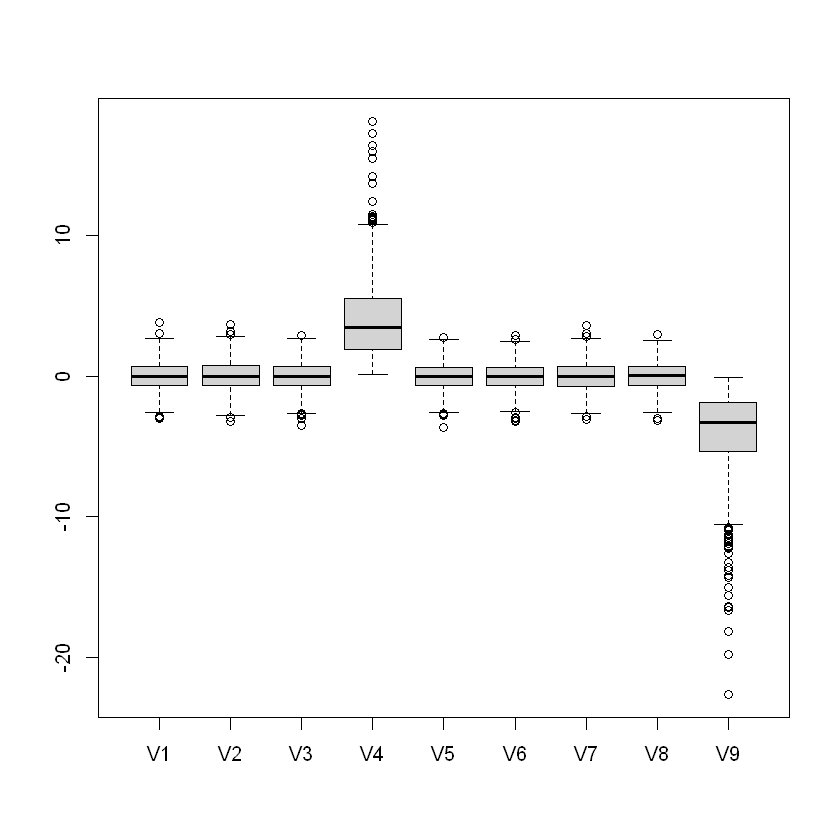

In [1]:
dat=read.csv("D:\\desktop\\dat.csv", sep = '\t', header = TRUE)
boxplot(dat)

V4 and V9 are different form others

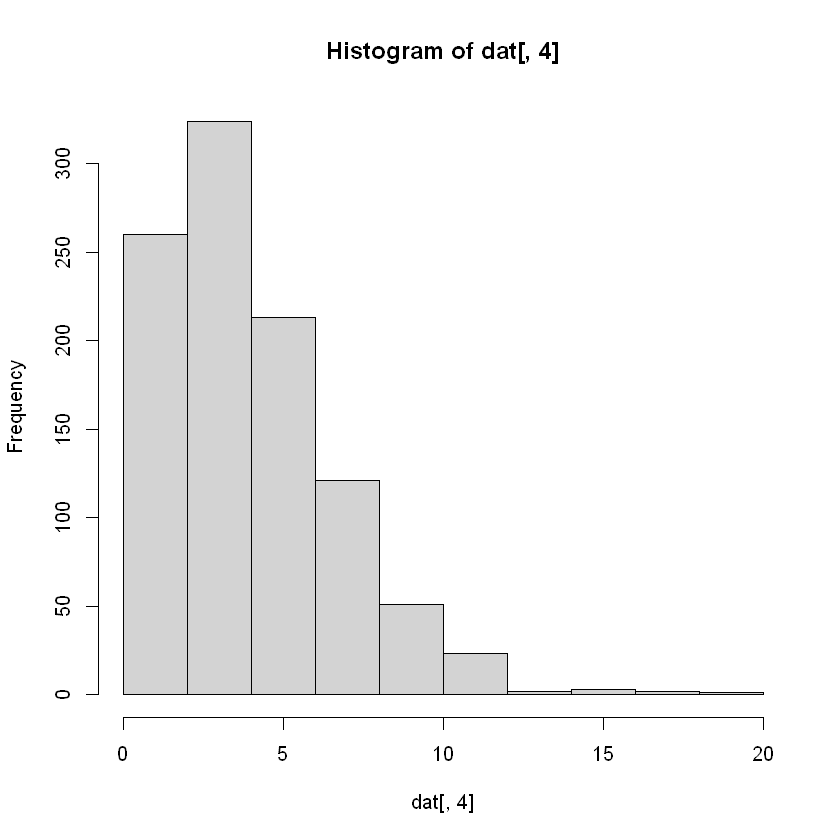

In [2]:
hist(dat[,4])

V4 is positively skewed.

Q4: Which is the column that is negatively skewed?

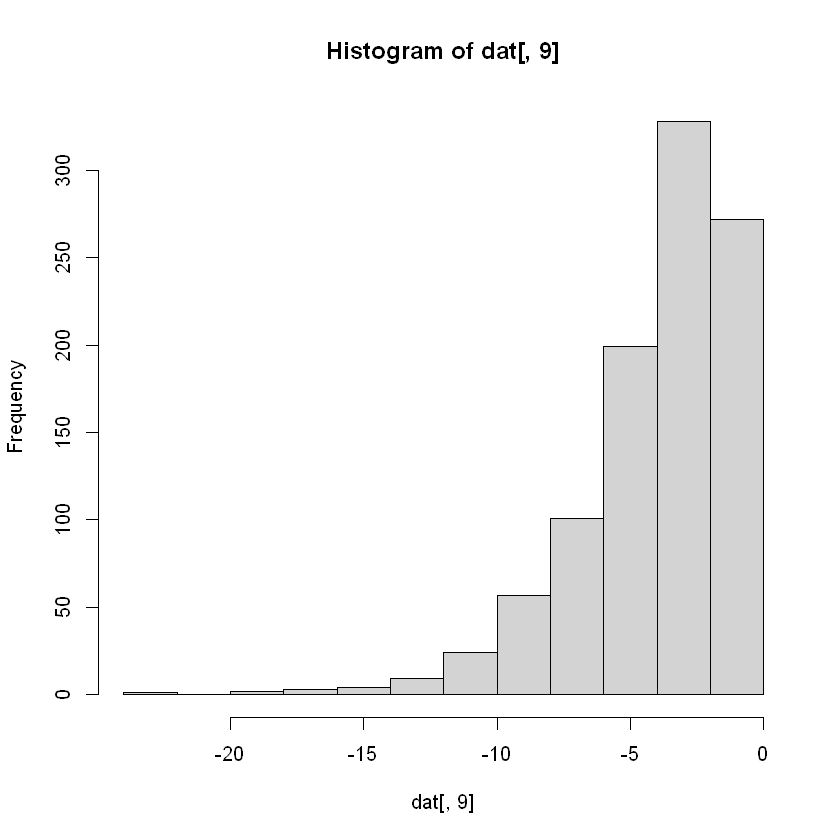

In [3]:
hist(dat[,9])

V4 is negatively skewed.

Q5: Let’s consider a random sample of finishers from the New York City Marathon in 2002. This
dataset can be found in the UsingR package. Load the library and then load the nym.2002 dataset.

In [1]:
library(dplyr)
data(nym.2002, package="UsingR")
head(nym.2002)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,place,gender,age,home,time
,<dbl>,<fct>,<dbl>,<fct>,<dbl>
3475,3592,Male,52,GBR,217.4833
13594,13853,Female,40,NY,272.5500
12012,12256,Male,31,FRA,265.2833
10236,10457,Female,33,MI,256.1500
9476,9686,Male,33,NY,252.2500
1720,1784,Male,40,NJ,201.9667


Use boxplots and histograms to compare the finishing times of males and females. Which of
the following best describes the difference?

• A) Males and females have the same distribution.

• B) Most males are faster than most women.

• C) Male and females have similar right skewed distributions with the former, 20 minutes
shifted to the left.

• D) Both distribution are normally distributed with a difference in mean of about 30
minutes.

In [2]:
male=nym.2002 %>% filter(gender=="Male") 
female=nym.2002 %>% filter(gender=="Female") 

Warning message in plot.window(xlim, ylim, "", ...):
""header" is not a graphical parameter"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
""header" is not a graphical parameter"
Warning message in axis(1, ...):
""header" is not a graphical parameter"
Warning message in axis(2, at = yt, ...):
""header" is not a graphical parameter"
Warning message in plot.window(xlim, ylim, "", ...):
""header" is not a graphical parameter"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
""header" is not a graphical parameter"
Warning message in axis(1, ...):
""header" is not a graphical parameter"
Warning message in axis(2, at = yt, ...):
""header" is not a graphical parameter"


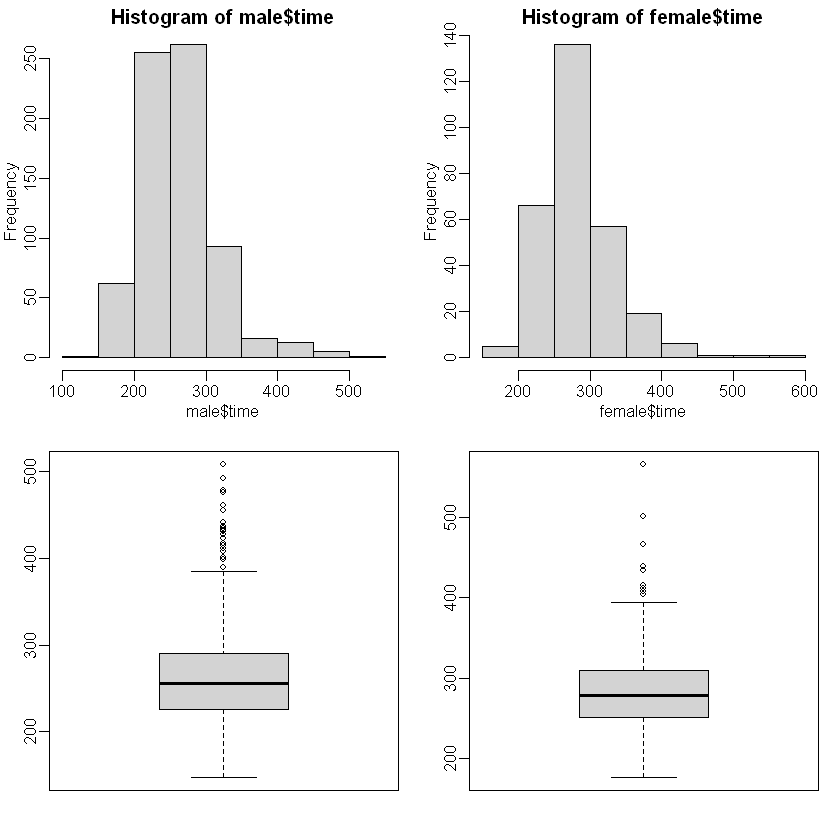

In [4]:
library(rafalib)
mypar(2,2)
hist(male$time,header="male-time-h")
hist(female$time,header="female-time-h")
boxplot(male$time,header="male-time-b")
boxplot(female$time,header="female-time-b")

In [5]:
a=mean(male$time)
b=mean(female$time)
abs(a)-abs(b)

[1] -23.11574

C

Q6: Use dplyr to create two new data frames: males and females, with the data for each gender.
For males, what is the Pearson correlation between age and time to finish?

In [6]:
cor(male$age,male$time)

[1] 0.2432273

Q7: For females, what is the Pearson correlation between age and time to finish?

In [7]:
cor(female$age,female$time)

[1] 0.2443156

Q8: 

If we interpret these correlations without visualizing the data, we would conclude that the
older we get, the slower we run marathons, regardless of gender. Look at scatterplots and
boxplots of times stratified by age groups (20-25, 25-30, etc..). After examining the data, what
is a more reasonable conclusion?

• A) Finish times are constant up until about our 40s, then we get slower.

• B) On average, finish times go up by about 7 minutes every five years.

• C) The optimal age to run a marathon is 20-25.

• D) Coding errors never happen: a five year old boy completed the 2012 NY city marathon

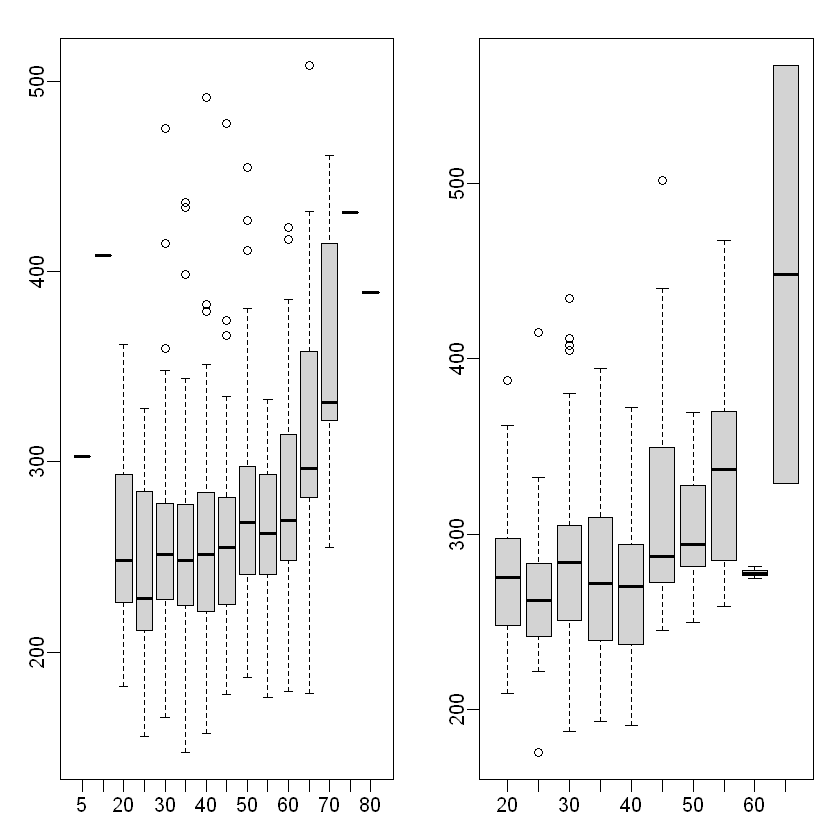

In [8]:
male1<- split(male$time, floor(male$age/5)*5)
female1 <- split(female$time, floor(female$age/5)*5)
mypar(1,2)
boxplot(male1)
boxplot(female1)

A

Q9: When is it appropriate to use pie charts or donut charts?

• A) When you are hungry.

• B) To compare percentages.

• C) To compare values that add up to 100%.

• D) Never.

D

Q10: The use of pseudo-3D plots in the literature mostly adds:

• A) Pizzazz.

• B) The ability to see three dimensional data.

• C) Ability to discover.

• D) Confusion.

D

## Robust Summaries

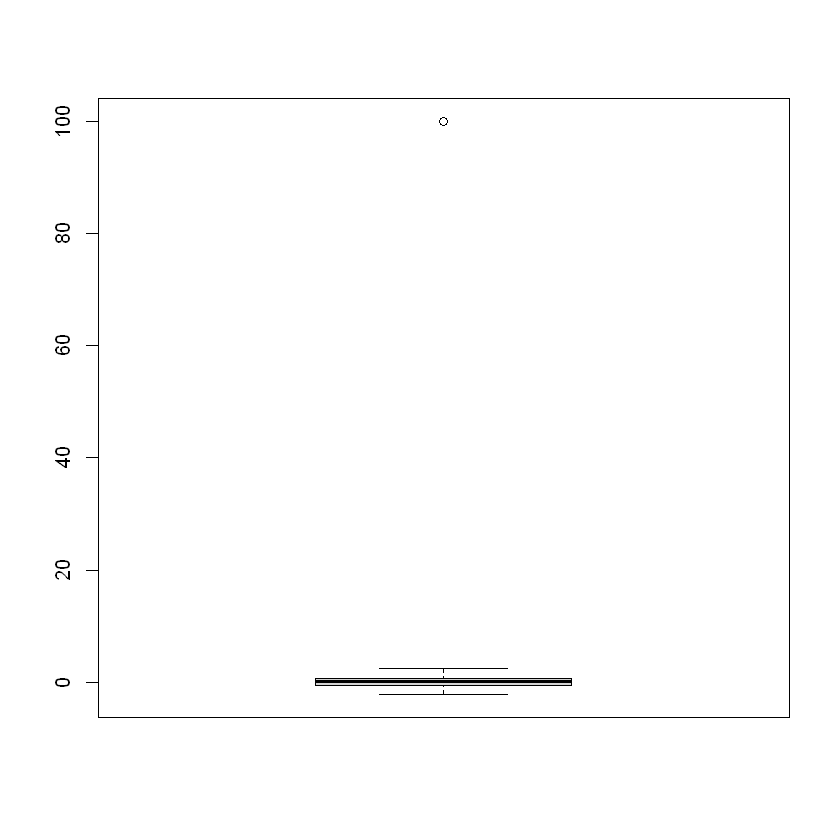

In [9]:
set.seed(1) 
x=c(rnorm(100,0,1)) ##real distribution
x[23] <- 100 ##mistake made in 23th measurement
boxplot(x)

In [10]:
cat("The average is",mean(x),"and the SD is",sd(x))

The average is 1.108142 and the SD is 10.02938

### The median

In [11]:
median(x)

[1] 0.1684483

### The median absolute deviation

median absolute deviation (MAD) = 1.4826 × median{|$X_i$ − median($X_i$)|}

In [12]:
mad(x)

[1] 0.8857141

### Spearman correlation

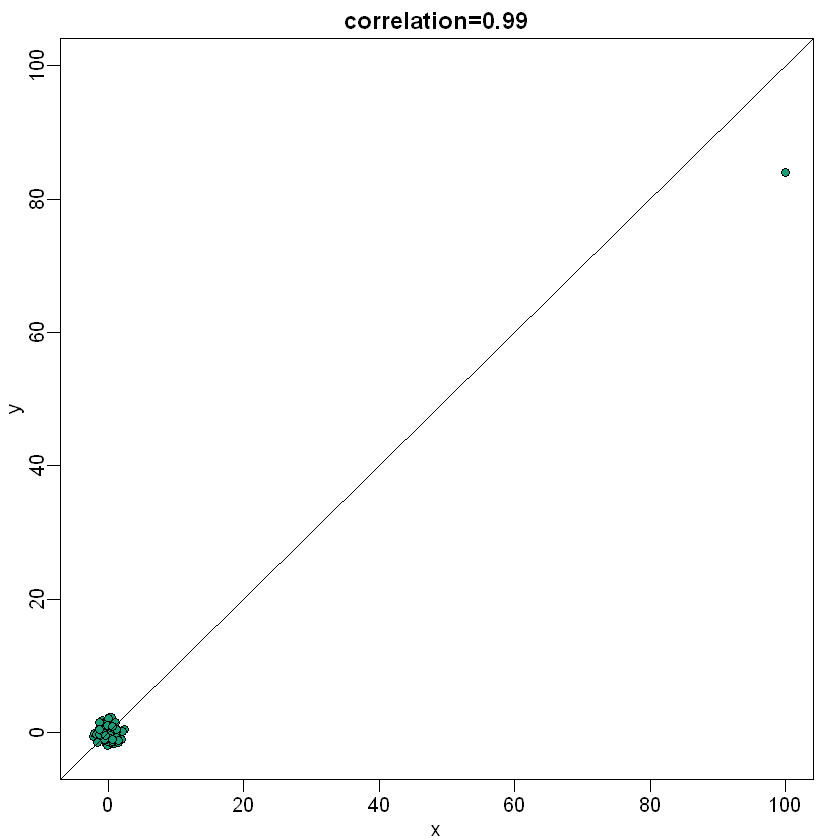

In [15]:
set.seed(1) 
x=c(rnorm(100,0,1)) ##real distribution
x[23] <- 100 ##mistake made in 23th measurement
y=c(rnorm(100,0,1)) ##real distribution
y[23] <- 84 ##similar mistake made in 23th measurement
library(rafalib)
mypar()
plot(x,y,main=paste0("correlation=",round(cor(x,y),3)),pch=21,bg=1,xlim=c(-3,100),ylim=c(-3,100))
abline(0,1)

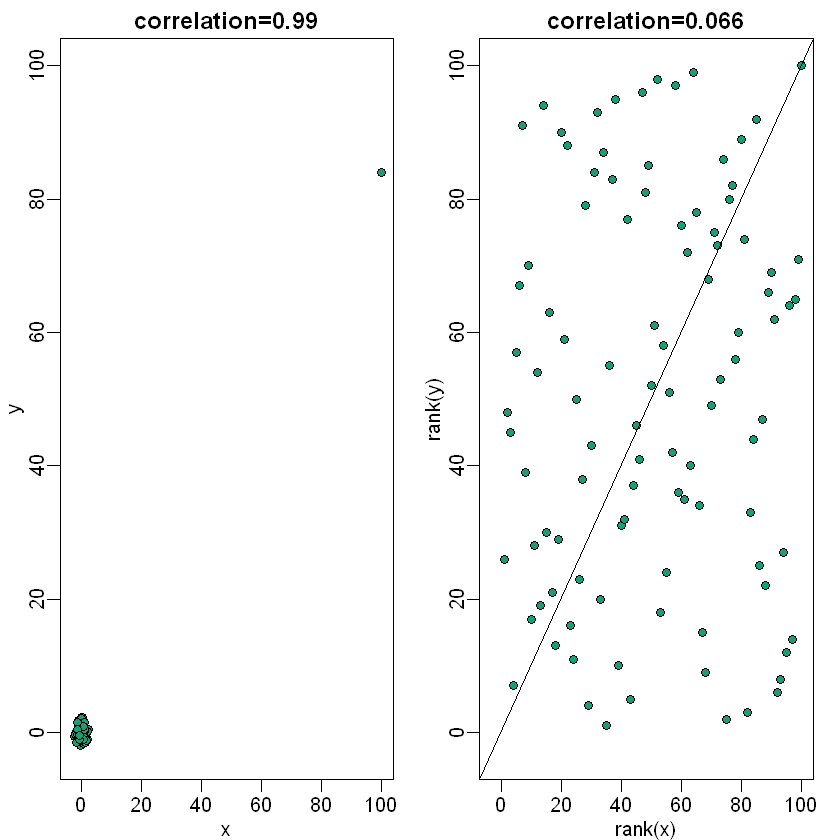

In [16]:
mypar(1,2)
plot(x,y,main=paste0("correlation=",round(cor(x,y),3)),pch=21,bg=1,xlim=c(-3,100),ylim=c(-3,100))
plot(rank(x),rank(y),main=paste0("correlation=",round(cor(x,y,method="spearman"),3)),pch=21,bg=1,xlim=c(-3,100),ylim=c(-3,100))
abline(0,1)

### Symmetry of log ratios

In [17]:
x <- 2^(rnorm(100))
y <- 2^(rnorm(100))
ratios <- x / y

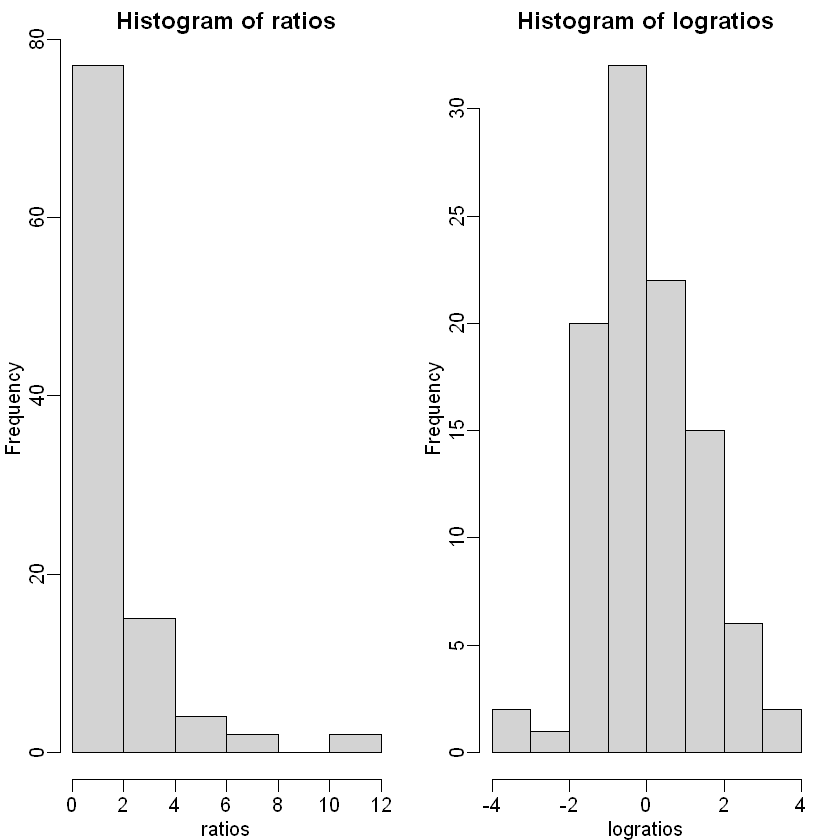

In [18]:
mypar(1,2)
hist(ratios)
logratios <- log2(ratios)
hist(logratios)

$$log(x/y) = log(x) − log(y) = −(log(y) − log(x)) = log(y/x)$$

In [20]:
set.seed(779) ##779 picked for illustration purposes
N=25
x<- rnorm(N,0,1) 
y<- rnorm(N,0,1)

In [21]:
x[1] <- 5
x[2] <- 7
cat("t-test pval:",t.test(x,y)$p.value)

t-test pval: 0.04439948

In [22]:
cat("Wilcox test pval:",wilcox.test(x,y)$p.value)

Wilcox test pval: 0.1310212

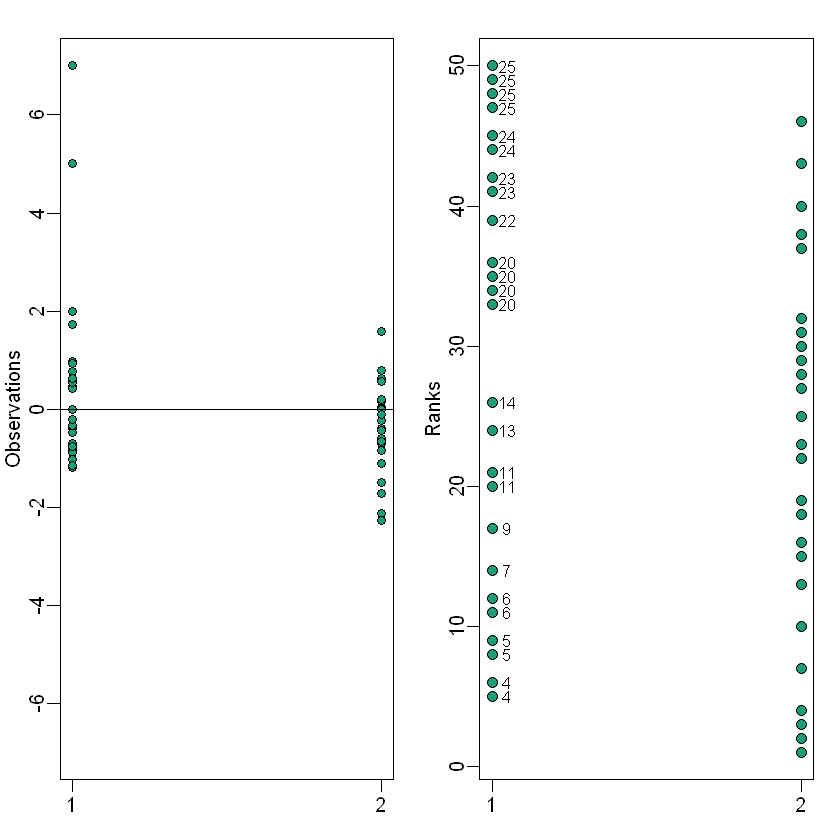

In [23]:
mypar(1,2)
stripchart(list(x,y),vertical=TRUE,ylim=c(-7,7),ylab="Observations",pch=21,bg=1)
abline(h=0)
xrank<-rank(c(x,y))[seq(along=x)]
yrank<-rank(c(x,y))[-seq(along=y)]
stripchart(list(xrank,yrank),vertical=TRUE,ylab="Ranks",pch=21,bg=1,cex=1.25)
ws <- sapply(x,function(z) rank(c(z,y))[1]-1)
text( rep(1.05,length(ws)), xrank, ws, cex=0.8)

In [24]:
W <-sum(ws)
n1<-length(x);n2<-length(y)
Z <- (mean(ws)-n2/2)/ sqrt(n2*(n1+n2+1)/12/n1)
print(Z)

[1] 1.523124


Exercise P 147

,weight,Time,Chick,Diet
,<dbl>,<dbl>,<ord>,<fct>
1,42,0,1,1
2,51,2,1,1
3,59,4,1,1
4,64,6,1,1
5,76,8,1,1
6,93,10,1,1


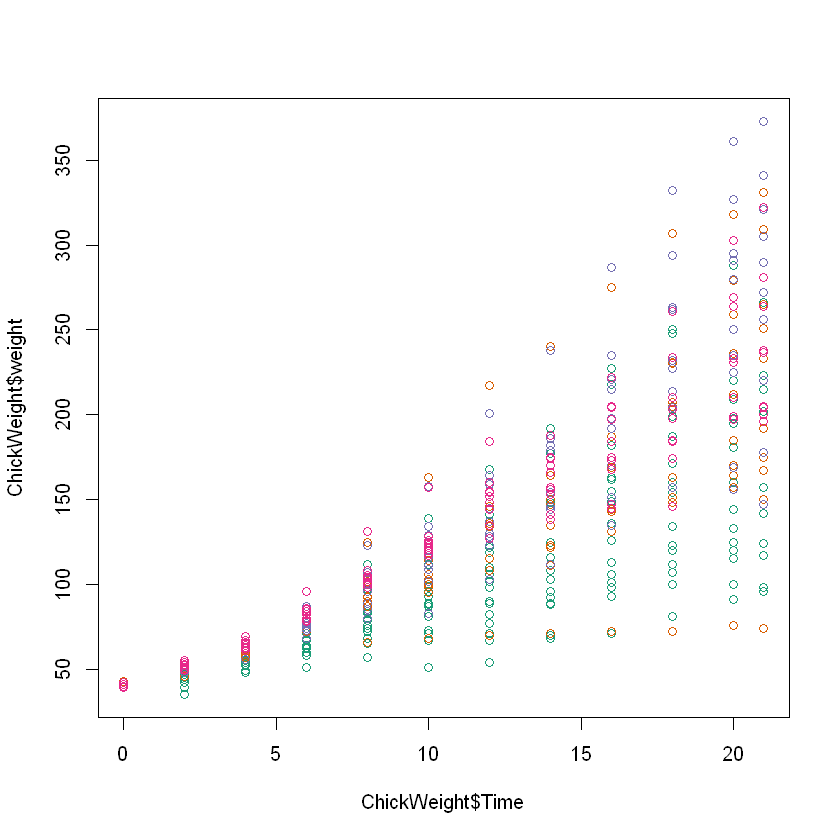

In [25]:
data(ChickWeight)
head(ChickWeight)
plot( ChickWeight$Time, ChickWeight$weight, col=ChickWeight$Diet)

In [26]:
chick = reshape(ChickWeight, idvar=c("Chick","Diet"), timevar="Time",
direction="wide")

In [27]:
head(chick)

,Chick,Diet,weight.0,weight.2,weight.4,weight.6,weight.8,weight.10,weight.12,weight.14,weight.16,weight.18,weight.20,weight.21
,<ord>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,42,51,59,64,76,93,106,125,149,171,199,205
13,2,1,40,49,58,72,84,103,122,138,162,187,209,215
25,3,1,43,39,55,67,84,99,115,138,163,187,198,202
37,4,1,42,49,56,67,74,87,102,108,136,154,160,157
49,5,1,41,42,48,60,79,106,141,164,197,199,220,223
61,6,1,41,49,59,74,97,124,141,148,155,160,160,157


In [28]:
chick = na.omit(chick)

Q1：Focus on the chick weights on day 4 (check the column names of ‘chick’ and note the
numbers). How much does the average of chick weights at day 4 increase if we add an outlier
measurement of 3000 grams? Specifically, what is the average weight of the day 4 chicks,
including the outlier chick, divided by the average of the weight of the day 4 chicks without
the outlier. Hint: use cto add a number to a vector.

In [30]:
wei4=chick$weight.4
wei41=c(chick$weight.4, 3000)

In [31]:
mean(wei41)-mean(wei4)
mean(wei41)/mean(wei4)

[1] 63.90966

[1] 2.062407

Q2: In exercise 1, we saw how sensitive the mean is to outliers. Now let’s see what happens when
we use the median instead of the mean. Compute the same ratio, but now using median instead
of mean. Specifically, what is the median weight of the day 4 chicks, including the outlier chick,
divided by the median of the weight of the day 4 chicks without the outlier.

In [32]:
median(wei41)/median(wei4)

[1] 1

Q3: Now try the same thing with the sample standard deviation (the sd function in R). Add a
chick with weight 3000 grams to the chick weights from day 4. How much does the standard
deviation change? What’s the standard deviation with the outlier chick divided by the standard
deviation without the outlier chick?

In [33]:
sd(wei41)-sd(wei4)
sd(wei41)/sd(wei4)

[1] 429.1973

[1] 101.2859

Q4:Compare the result above to the median absolute deviation in R, which is calculated with
the mad function. Note that the mad is unaffected by the addition of a single outlier. The mad
function in R includes the scaling factor 1.4826, such that mad and sd are very similar for a
sample from a normal distribution. What’s the MAD with the outlier chick divided by the
MAD without the outlier chick?

In [34]:
mad(wei41)/mad(wei4)

[1] 1

Q5: Our last question relates to how the Pearson correlation is affected by an outlier as compared to
the Spearman correlation. The Pearson correlation between x and y is given in R by cor(x,y).
The Spearman correlation is given by cor(x,y,method="spearman").

Plot the weights of chicks from day 4 and day 21. We can see that there is some general trend,
with the lower weight chicks on day 4 having low weight again on day 21, and likewise for
the high weight chicks.

Calculate the Pearson correlation of the weights of chicks from day 4 and day 21. Now calculate
how much the Pearson correlation changes if we add a chick that weighs 3000 on day4 and
3000 on day 21. Again, divide the Pearson correlation with the outlier chick over the Pearson
correlation computed without the outliers.

In [35]:
wei21=chick$weight.21
wei211=c(chick$weight.21, 3000)

In [37]:
c1=cor(wei4,wei21,method="pearson")
c1

[1] 0.4159499

In [38]:
c2=cor(wei41,wei211,method="pearson")
c2/c1

[1] 2.370719

Q6:Save the weights of the chicks on day 4 from diet 1 as a vector x. Save the weights of the
chicks on day 4 from diet 4 as a vector y. Perform a t-test comparing x and y (in R the function
t.test(x,y) will perform the test). Then perform a Wilcoxon test of x and y (in R the function
wilcox.test(x,y) will perform the test). A warning will appear that an exact p-value cannot
be calculated with ties, so an approximation is used, which is fine for our purposes.
Perform a t-test of x and y, after adding a single chick of weight 200 grams to x (the diet 1
chicks). What is the p-value from this test? The p-value of a test is available with the following
code: t.test(x,y)$p.value

In [39]:
xx=ChickWeight %>% filter(Time==4&Diet==1) 
yy=ChickWeight %>% filter(Time==4&Diet==4) 
head(xx)

,weight,Time,Chick,Diet
,<dbl>,<dbl>,<ord>,<fct>
1,59,4,1,1
2,58,4,2,1
3,55,4,3,1
4,56,4,4,1
5,48,4,5,1
6,59,4,6,1


In [40]:
x=xx$weight
x=yy$weight
t.test(x,y)


	Welch Two Sample t-test

data:  x and y
t = 78.408, df = 9.9455, p-value = 3.233e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 62.98550 66.67278
sample estimates:
mean of x mean of y 
 64.50000  -0.32914 


In [41]:
wilcox.test(x,y)

Warning message in wilcox.test.default(x, y):
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  x and y
W = 250, p-value = 5.448e-06
alternative hypothesis: true location shift is not equal to 0


In [42]:
x=c(x,200)
t.test(x,y)$p.value

[1] 9.471647e-05

Q7: Do the same for the Wilcoxon test. The Wilcoxon test is robust to the outlier. In addition, it
has less assumptions that the t-test on the distribution of the underlying data.

In [43]:
wilcox.test(x,y)$p.value

Warning message in wilcox.test.default(x, y):
"cannot compute exact p-value with ties"


[1] 2.533238e-06

Q8: We will now investigate a possible downside to the Wilcoxon-Mann-Whitney test statistic.
Using the following code to make three boxplots, showing the true Diet 1 vs 4 weights, and
then two altered versions: one with an additional difference of 10 grams and one with an
additional difference of 100 grams. Use the x and y as defined above, NOT the ones with the
added outlier.

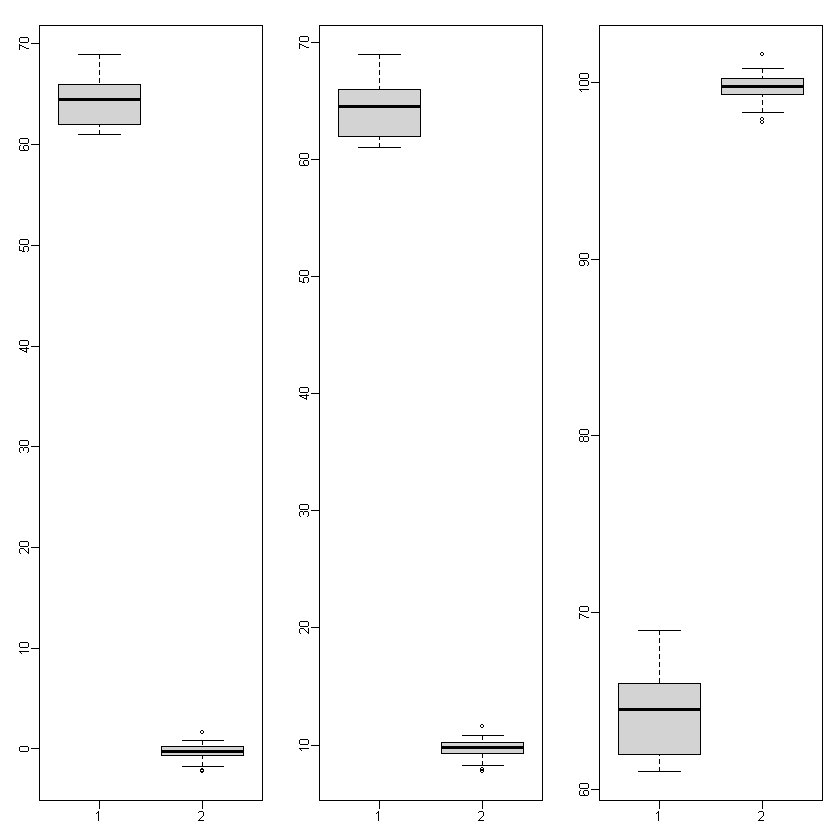

In [45]:
x=xx$weight
x=yy$weight
library(rafalib)
mypar(1,3)
boxplot(x,y)
boxplot(x,y+10)
boxplot(x,y+100)

What is the difference in t-test statistic (obtained by t.test(x,y)$statistic) between adding
10 and adding 100 to all the values in the group ‘y’? Take the the t-test statistic with x and
y+10 and subtract the t-test statistic with x and y+100. The value should be positive.

In [46]:
t.test(x,y+10)$statistic-t.test(x,y+100)$statistic

t 
108.8505

Q9:Examine the Wilcoxon test statistic for x and y+10 and for x and y+100. Because the Wilcoxon
works on ranks, once the two groups show complete separation, that is all points from group
‘y’ are above all points from group ‘x’, the statistic will not change, regardless of how large the
difference grows. Likewise, the p-value has a minimum value, regardless of how far apart the
groups are. This means that the Wilcoxon test can be considered less powerful than the t-test
in certain contexts. In fact, for small sample sizes, the p-value can’t be very small, even when
the difference is very large. What is the p-value if we compare c(1,2,3) to c(4,5,6) using a
Wilcoxon test?

In [47]:
wilcox.test(x,y+10)

Warning message in wilcox.test.default(x, y + 10):
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  x and y + 10
W = 250, p-value = 5.448e-06
alternative hypothesis: true location shift is not equal to 0


In [48]:
wilcox.test(x,y+100)

Warning message in wilcox.test.default(x, y + 100):
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  x and y + 100
W = 0, p-value = 5.448e-06
alternative hypothesis: true location shift is not equal to 0


In [49]:
a=c(1,2,3)
b=c(4,5,6)
wilcox.test(a,b)


	Wilcoxon rank sum exact test

data:  a and b
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0


Q10: What is the p-value if we compare c(1,2,3) to c(400,500,600) using a Wilcoxon test?

In [50]:
d=c(400,500,600)
wilcox.test(a,d)


	Wilcoxon rank sum exact test

data:  a and d
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0
